# Breast Cancer Classification

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df = df.drop(columns=["Unnamed: 32"])

In [12]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [15]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

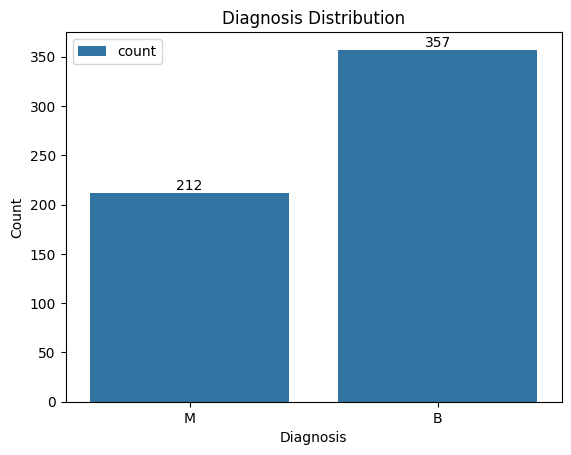

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vertical bar chart
ax=sns.countplot(data=df, x='diagnosis', label="count")
ax.bar_label(ax.containers[0])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Diagnosis Distribution")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb=LabelEncoder()

In [19]:
df.iloc[:, 1]=lb.fit_transform(df.iloc[:, 1].values)

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [22]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [23]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Features to drop:", to_drop)

df_reduced = df.drop(columns=to_drop)

print("Original shape:", df.shape)
print("Reduced shape:", df_reduced.shape)

Features to drop: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Original shape: (569, 32)
Reduced shape: (569, 22)


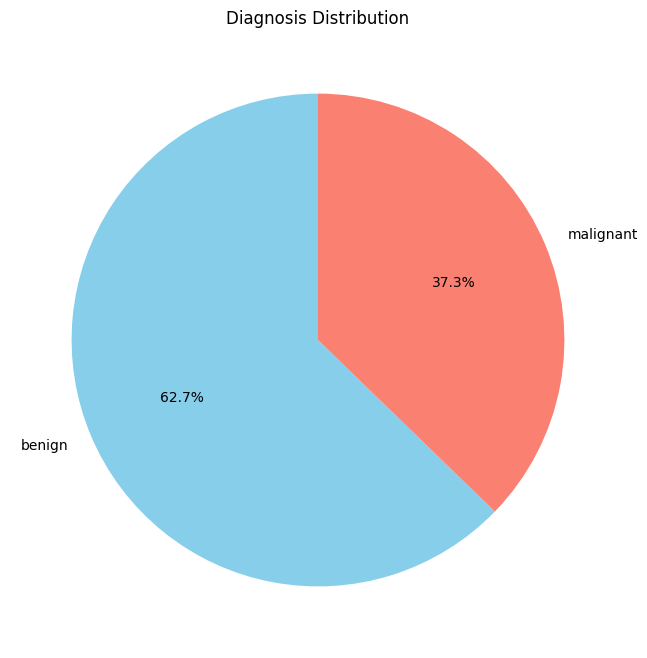

In [31]:
# Get the counts of each diagnosis
diagnosis_counts = df_reduced['diagnosis'].replace({0: 'benign', 1: 'malignant'}).value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    diagnosis_counts, 
    labels=diagnosis_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'salmon'] 
)
plt.title("Diagnosis Distribution")
plt.show()

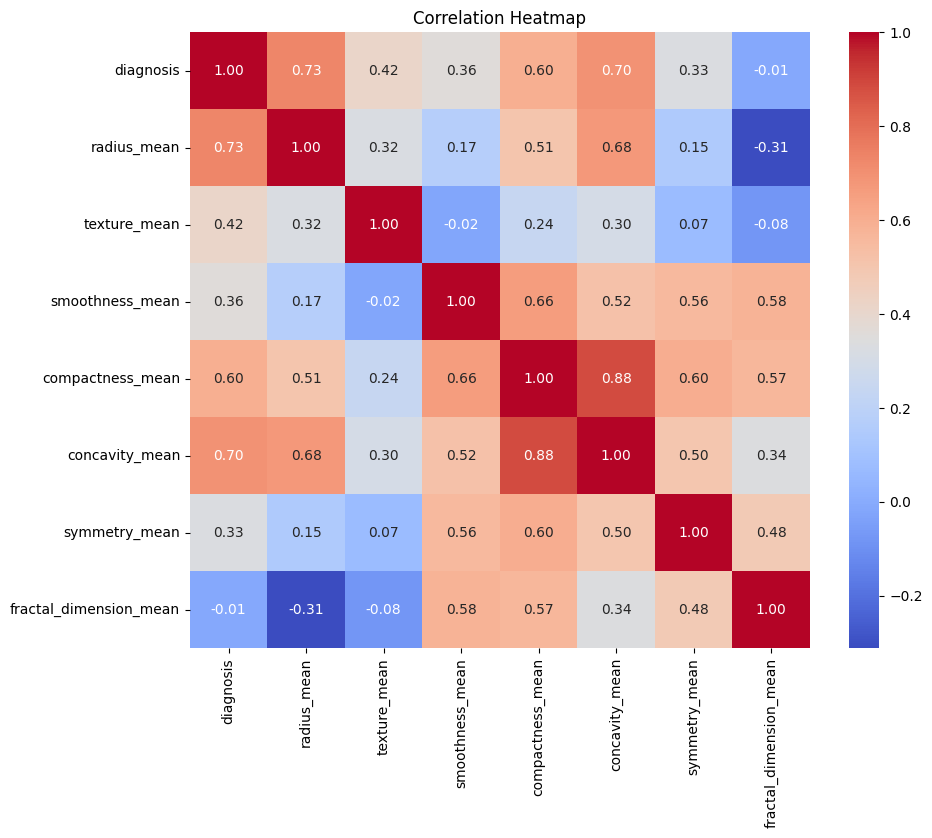

In [25]:
import seaborn as sns
# Compute the correlation matrix for the selected columns
correlation_matrix = df_reduced.iloc[:, 1:9].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set a suitable figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap")
plt.show()

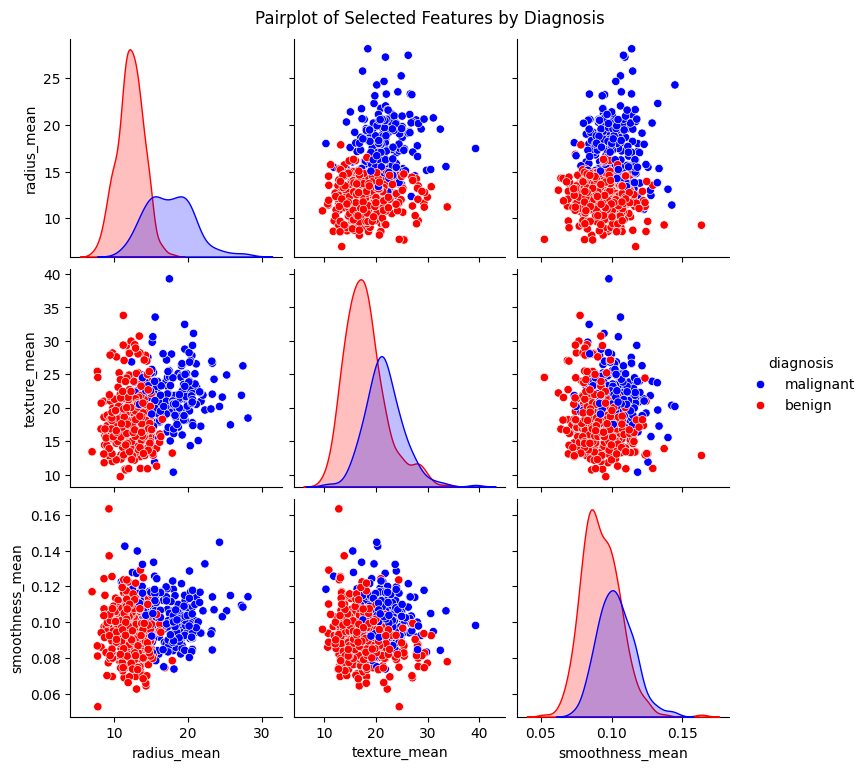

In [30]:
subset_df = df_reduced.iloc[:, 1:5].copy()
subset_df['diagnosis'] = df_reduced['diagnosis'].replace({0: 'benign', 1: 'malignant'})  # Replace numeric values with labels

# Create the pairplot
sns.pairplot(subset_df, hue="diagnosis", palette={'benign': "red", 'malignant': "blue"})
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

In [27]:
X=df_reduced.iloc[:, 2:32].values

In [28]:
X

array([[17.99   , 10.38   ,  0.1184 , ...,  0.7119 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.2416 ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.4504 ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.3403 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.9387 ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [29]:
y = df_reduced.iloc[:, 1].values

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st  = StandardScaler()

In [35]:
X_train  = st.fit_transform(X_train)
X_test  = st.fit_transform(X_test)

In [36]:
X_train.shape

(455, 20)

In [37]:
y_train.shape

(455,)

In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [39]:
log = LogisticRegression()

In [40]:
print(y_train.dtype)

object


In [41]:
y_train = y_train.astype(int)

In [42]:
log.fit(X_train, y_train)

LogisticRegression()

In [43]:
log.score(X_train, y_train)

0.9802197802197802

In [44]:
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score

In [45]:
y_test = y_test.astype(int)

In [46]:
accuracy_score(y_test, log.predict(X_test))

0.9736842105263158

In [47]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



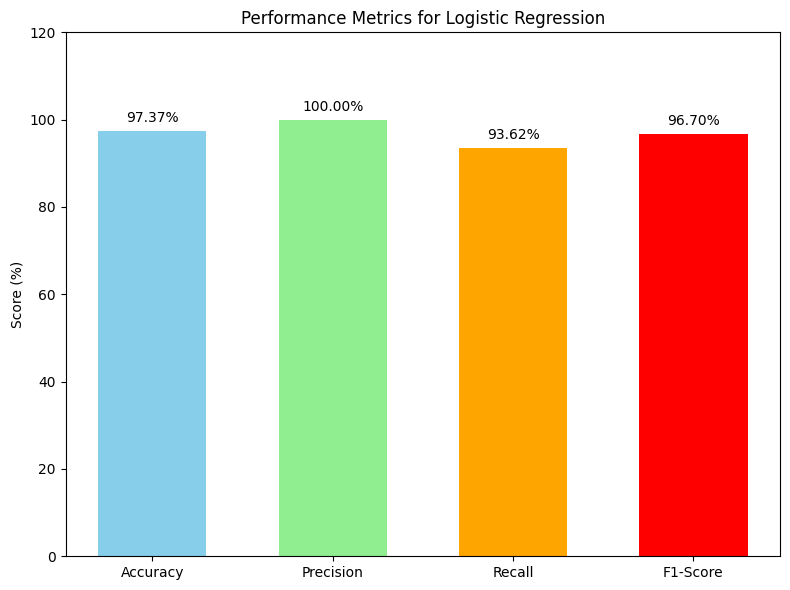

In [48]:
# Generate predictions
y_pred_log = log.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred_log) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred_log) * 100
recall = recall_score(y_test, y_pred_log) * 100
f1 = f1_score(y_test, y_pred_log) * 100

# Metrics list
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot the metrics
plt.figure(figsize=(8, 6))
bar_width=0.6
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen', 'orange', 'red'],width=bar_width)

# Add labels and title
plt.ylabel('Score (%)')
plt.title('Performance Metrics for Logistic Regression')
plt.ylim(0, 120)  # Set y-axis limit from 0 to 120

# Display the scores on top of each bar
for i, value in enumerate(metrics):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [49]:
import pickle

In [50]:
pickle.dump(log, open("model.pkl", "wb"))

In [51]:
pickle.load(open("model.pkl", "rb"))

LogisticRegression()

In [52]:
accuracy_score(y_test, log.predict(X_test))

0.9736842105263158

In [53]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [54]:
# Save the scaler
pickle.dump(st, open("scaler.pkl", "wb"))

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
log = DecisionTreeClassifier()

In [57]:
log.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
log.score(X_train, y_train)

1.0

In [59]:
accuracy_score(y_test, log.predict(X_test))

0.9210526315789473

In [60]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



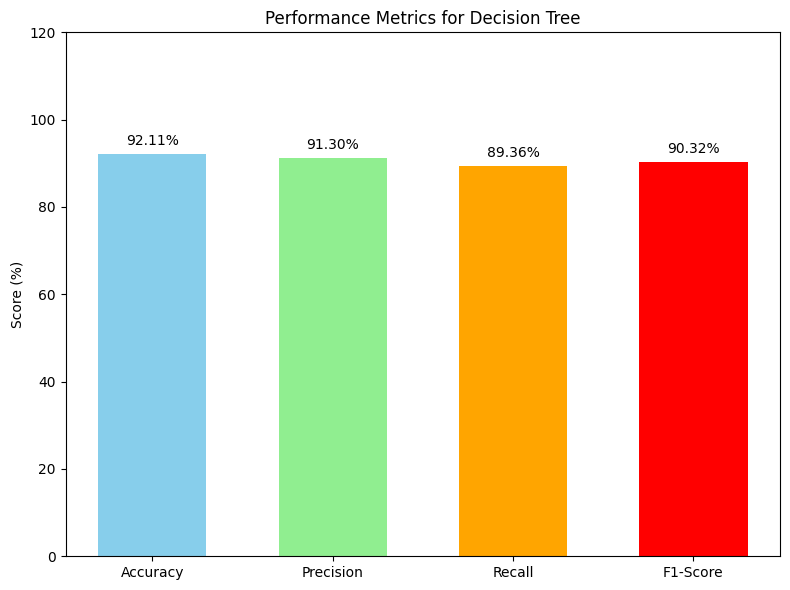

In [61]:
# Generate predictions
y_pred_log = log.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred_log) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred_log) * 100
recall = recall_score(y_test, y_pred_log) * 100
f1 = f1_score(y_test, y_pred_log) * 100

# Metrics list
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot the metrics with narrower bars
plt.figure(figsize=(8, 6))
bar_width = 0.6 
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen', 'orange', 'red'], width=bar_width)

# Add labels and title
plt.ylabel('Score (%)')
plt.title('Performance Metrics for Decision Tree')
plt.ylim(0, 120) 

# Display the scores on top of each bar
for i, value in enumerate(metrics):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
from sklearn.svm import SVC

In [63]:
svm_model = SVC(kernel='linear', random_state=42)

In [64]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [65]:
svm_predictions = svm_model.predict(X_test)

In [66]:
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)

In [67]:
print(svm_train_accuracy)

0.9846153846153847


In [68]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



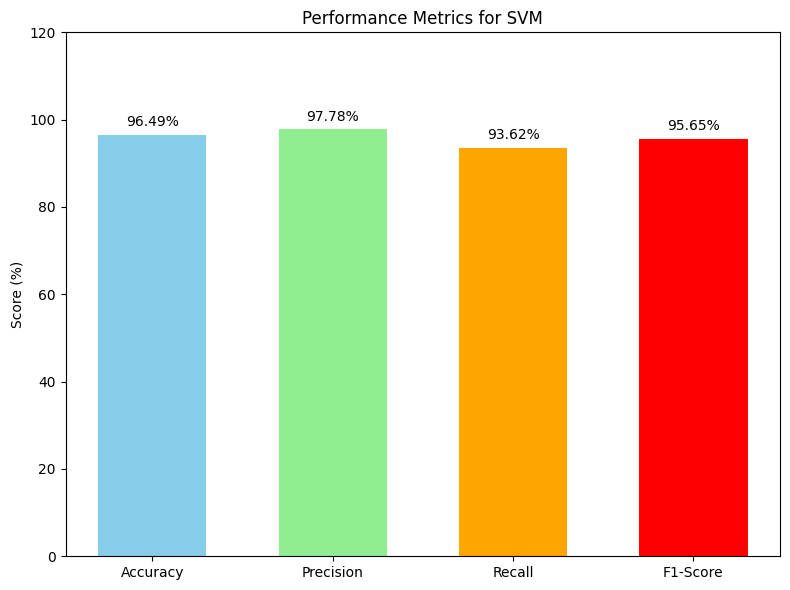

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate predictions
y_pred = svm_model.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Metrics list
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot the metrics with narrower bars
plt.figure(figsize=(8, 6))
bar_width = 0.6  # Adjust the bar width (default is 0.8)
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen', 'orange', 'red'], width=bar_width)

# Add labels and title
plt.ylabel('Score (%)')
plt.title('Performance Metrics for SVM')
plt.ylim(0, 120)

# Display the scores on top of each bar
for i, value in enumerate(metrics):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
rf_train_predictions = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print(rf_train_accuracy)

1.0


In [73]:
rf_test_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(rf_test_accuracy)

0.9473684210526315


In [74]:
print(classification_report(y_test, rf_test_predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



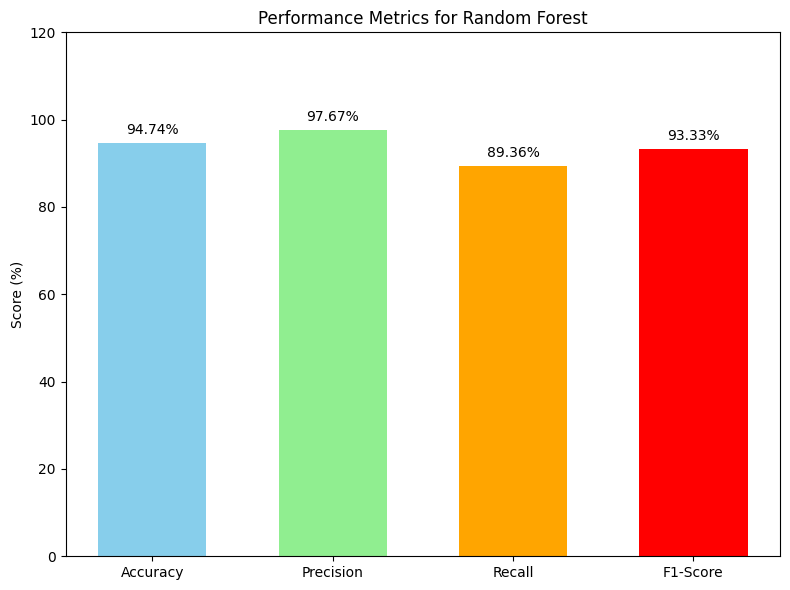

In [75]:
y_pred = rf_model.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred) * 100 
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Metrics list
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot the metrics with narrower bars
plt.figure(figsize=(8, 6))
bar_width = 0.6 
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen', 'orange', 'red'], width=bar_width)

# Add labels and title
plt.ylabel('Score (%)')
plt.title('Performance Metrics for Random Forest')
plt.ylim(0, 120)

# Display the scores on top of each bar
for i, value in enumerate(metrics):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()